In [14]:
import sys
sys.path.insert(0, '../')

from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


training...
 [ 500 / 500 ] 100% 0.00034 it/squantization...


building new image...
done.


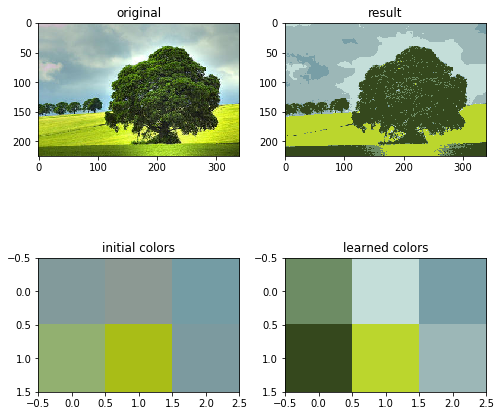

In [33]:
%autoreload 2
# read the image
img = plt.imread('tree.jpg')

# reshaping the pixels matrix
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

# SOM initialization and training
print('training...')
som = MiniSom(2, 3, 3, sigma=1.,
              learning_rate=0.2, neighborhood_function='bubble')  # 3x3 = 9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(pixels, 500, verbose=True)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
print('building new image...')
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(img.shape[0], img.shape[1]))] = q
print('done.')

# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.savefig('resulting_images/som_color_quantization.png')
plt.show()